In [1]:
# Data Manipulation and Analysis
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Warnings
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Load dataset
customer_data = pd.read_csv('C:/Users/Rahul/Desktop/DSA/Data_Science/Customer_Segmentation/data/raw/Mall_Customers.csv')

# Display first few rows
print(customer_data.head())

# Dataset shape
print(f"Dataset Shape: {customer_data.shape}")


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
Dataset Shape: (200, 5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.00000

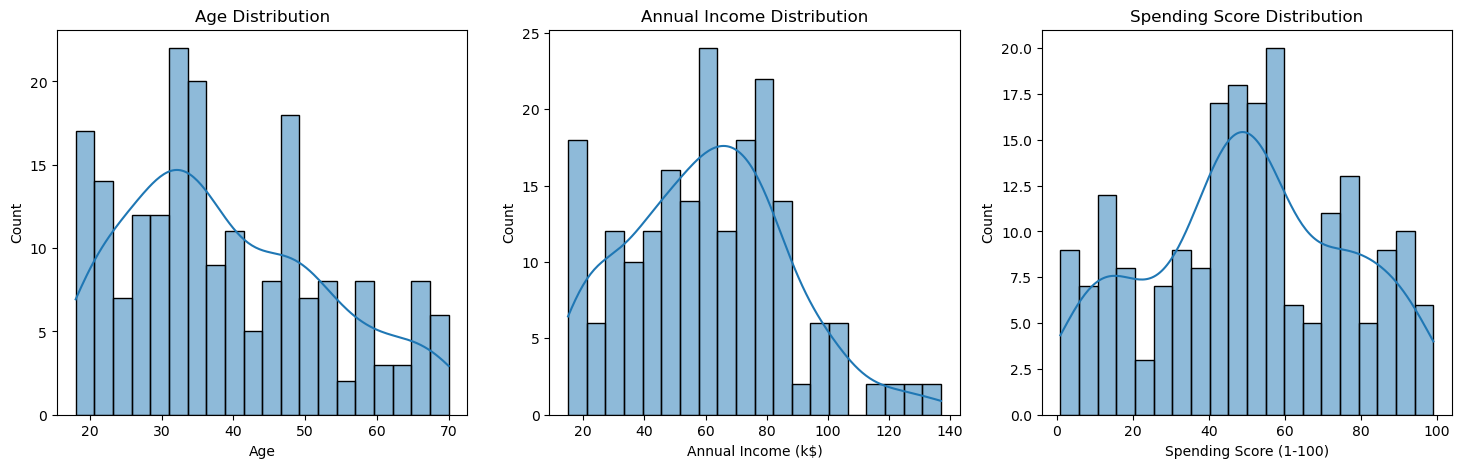

In [3]:
# Basic Info
print(customer_data.info())

# Check for null values
print(customer_data.isnull().sum())

# Statistical Summary
print(customer_data.describe())

# Visualization: Distribution of Age, Income, Spending Score
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(customer_data['Age'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')

sns.histplot(customer_data['Annual Income (k$)'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Annual Income Distribution')

sns.histplot(customer_data['Spending Score (1-100)'], bins=20, kde=True, ax=axes[2])
axes[2].set_title('Spending Score Distribution')
plt.show()


In [4]:
# Selecting relevant features
data = customer_data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


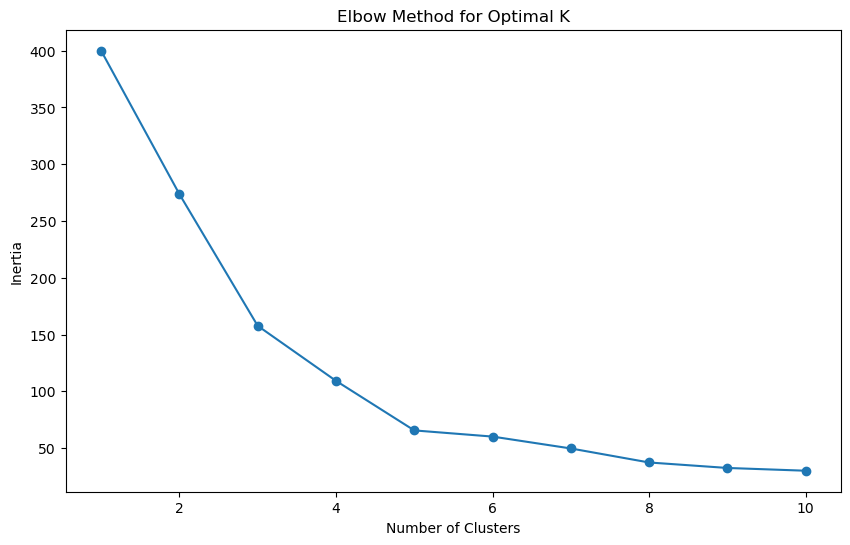

In [5]:
# Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [6]:
# Optimal clusters chosen based on Elbow Method
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(data_scaled)

# Cluster Centers
print("Cluster Centers:\n", kmeans.cluster_centers_)


Cluster Centers:
 [[-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [-1.32954532  1.13217788]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]]


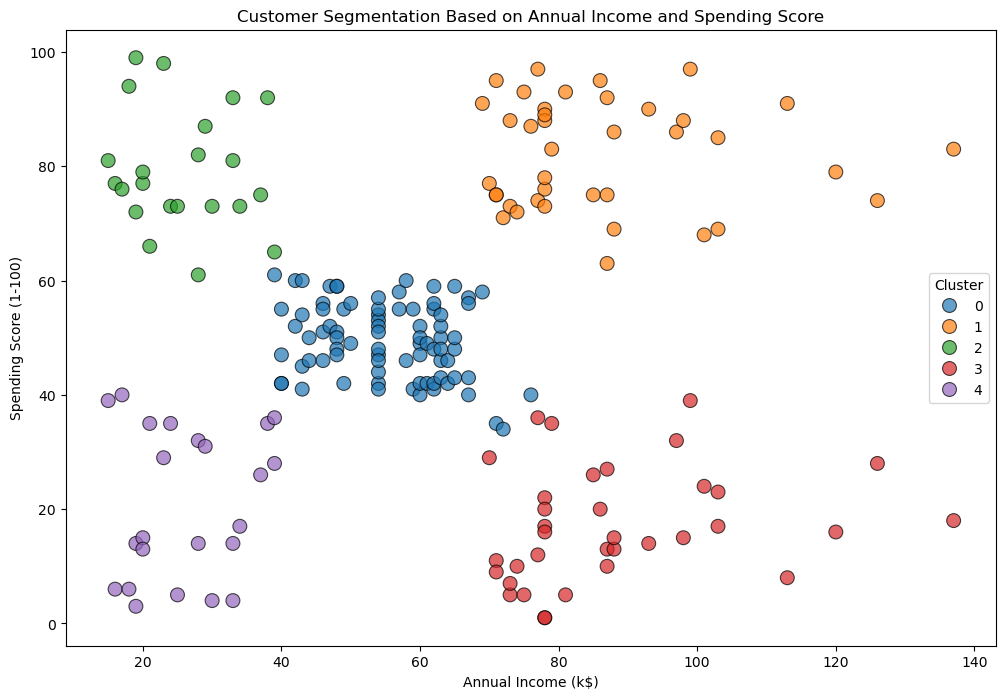

In [7]:
# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=customer_data['Annual Income (k$)'],
    y=customer_data['Spending Score (1-100)'],
    hue=customer_data['Cluster'],
    palette='tab10',
    s=100,
    alpha=0.7,
    edgecolor='k'
)
plt.title('Customer Segmentation Based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()


In [9]:
# Insights from each cluster
cluster_summary = customer_data.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)

# Additional Analysis (e.g., Size of Each Cluster)
print(customer_data['Cluster'].value_counts())


         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0         86.320988  42.716049           55.296296               49.518519
1        162.000000  32.692308           86.538462               82.128205
2         23.090909  25.272727           25.727273               79.363636
3        164.371429  41.114286           88.200000               17.114286
4         23.000000  45.217391           26.304348               20.913043
Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64


In [10]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(data_scaled, customer_data['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.5546571631111091
